<a href="https://colab.research.google.com/github/JoanesMiranda/Machine-learning/blob/master/Autoenconder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

### Carregando a base de dados

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Plotando uma amostra das imagens

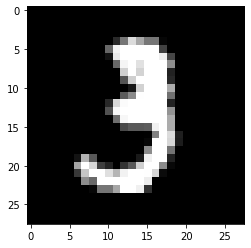

In [3]:
plt.imshow(x_train[10], cmap="gray")

### Aplicando normalização nos dados de treino e teste

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Adicionando ruido a base de treino

In [5]:
noise = 0.3

noise_x_train = []

for img in x_train:
  noisy_image = img + noise * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_x_train.append(noisy_image)

noise_x_train = np.array(noise_x_train)

print(noise_x_train.shape)

(60000, 28, 28)


### Plotando uma amostra da imagem com o ruido aplicado

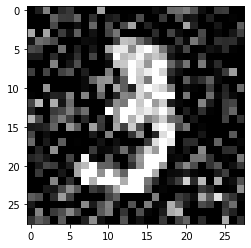

In [6]:
plt.imshow(noise_x_train[10], cmap="gray")

### Adicionando ruido a base de teste

In [7]:
noise = 0.3

noise_x_test = []

for img in x_train:
  noisy_image = img + noise * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_x_test.append(noisy_image)

noise_x_test = np.array(noise_x_test)

print(noise_x_test.shape)

(60000, 28, 28)


### Plotando uma amostra da imagem com o ruido aplicado

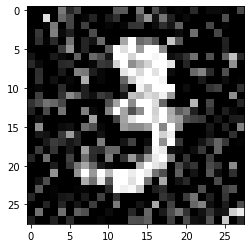

In [8]:
plt.imshow(noise_x_test[10], cmap="gray")

In [9]:
noise_x_train = np.reshape(noise_x_train,(-1, 28, 28, 1))
noise_x_test = np.reshape(noise_x_test,(-1, 28, 28, 1))

print(noise_x_train.shape)
print(noise_x_test.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


### Autoencoder

In [10]:
x_input = tf.keras.layers.Input((28,28,1))

# encoder
x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(x_input)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(x)

# decoder
x = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(x)

model = tf.keras.models.Model(inputs=x_input, outputs=x)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 2,633
Trainable params: 2,633
Non-trainable params: 0
_________________________________________________________________


### Treinando os dados

In [11]:
model.fit(noise_x_train, x_train, batch_size=100, validation_split=0.1, epochs=10)

Epoch 1/10
540/540 [==============================] - 3s 5ms/step - loss: 0.1840 - val_loss: 0.0955
Epoch 2/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0901 - val_loss: 0.0883
Epoch 3/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0870 - val_loss: 0.0872
Epoch 4/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0863 - val_loss: 0.0867
Epoch 5/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0861 - val_loss: 0.0866
Epoch 6/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0859 - val_loss: 0.0864
Epoch 7/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0857 - val_loss: 0.0862
Epoch 8/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0856 - val_loss: 0.0861
Epoch 9/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0856 - val_loss: 0.0861
Epoch 10/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0855 - val_loss: 0.0861

### Realizando a predição das imagens usando os dados de teste com o ruido aplicado

In [12]:
predicted = model.predict(noise_x_test)
predicted

array([[[[1.52928021e-03],
         [2.87204632e-04],
         [5.91388438e-04],
         ...,
         [7.60343610e-05],
         [1.07775326e-04],
         [6.38045531e-05]],

        [[1.24417769e-04],
         [1.42115696e-05],
         [5.81620552e-05],
         ...,
         [2.14482825e-05],
         [1.48685549e-05],
         [2.35713060e-06]],

        [[1.31354318e-04],
         [1.21184039e-05],
         [2.65128154e-04],
         ...,
         [5.90584590e-04],
         [1.24605474e-04],
         [4.07240077e-05]],

        ...,

        [[2.10967701e-04],
         [1.56093796e-04],
         [3.96581279e-04],
         ...,
         [6.92457007e-03],
         [2.92748748e-03],
         [5.13407635e-04]],

        [[2.35214291e-04],
         [3.86196880e-05],
         [1.33880720e-04],
         ...,
         [9.43938363e-03],
         [4.08012327e-03],
         [1.01053726e-03]],

        [[3.38198268e-04],
         [2.28342906e-05],
         [5.19917667e-05],
         ...,
 

### Plotando as imagens com ruido e depois de aplicar o autoencoder

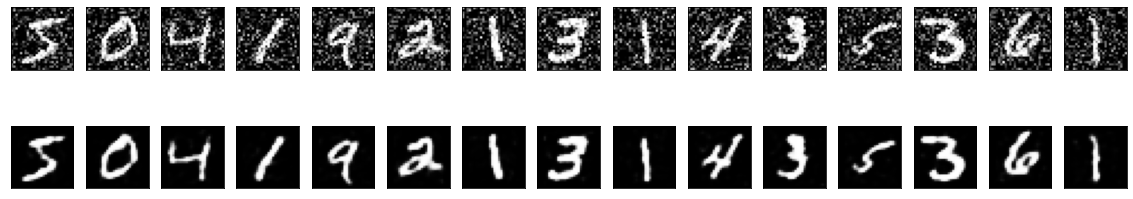

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=15, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_x_test[:15], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)